![Alt text](image.png)

## 1.Seaborn이란?


- matplotlib을 기본으로 다양한 시각화 기법을 제공하는 라이브러리.


- 엄청나게 화려한 시각화 기법들을 제공하며, 기본적으로 이쁩니다.
>  histplot, kdeplot, jointplot, Facetgrid, ...


- pandas DataFrame과 매우 호환이 잘 됩니다.

  >  e.g. sns.xxxplot(data=df)    **<--- 기본세팅!**

## 2. 경향성 표현하기

In [1]:
# 라이브러리와 데이터를 불러오고, 시각화를 위한 세팅을 합니다.

import seaborn as sns
sns.set_theme(style='whitegrid')
penguins = sns.load_dataset("penguins").dropna()
                                    # NaN 데이터 제거
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

- 주로 주가 그래프로 많이 사용함

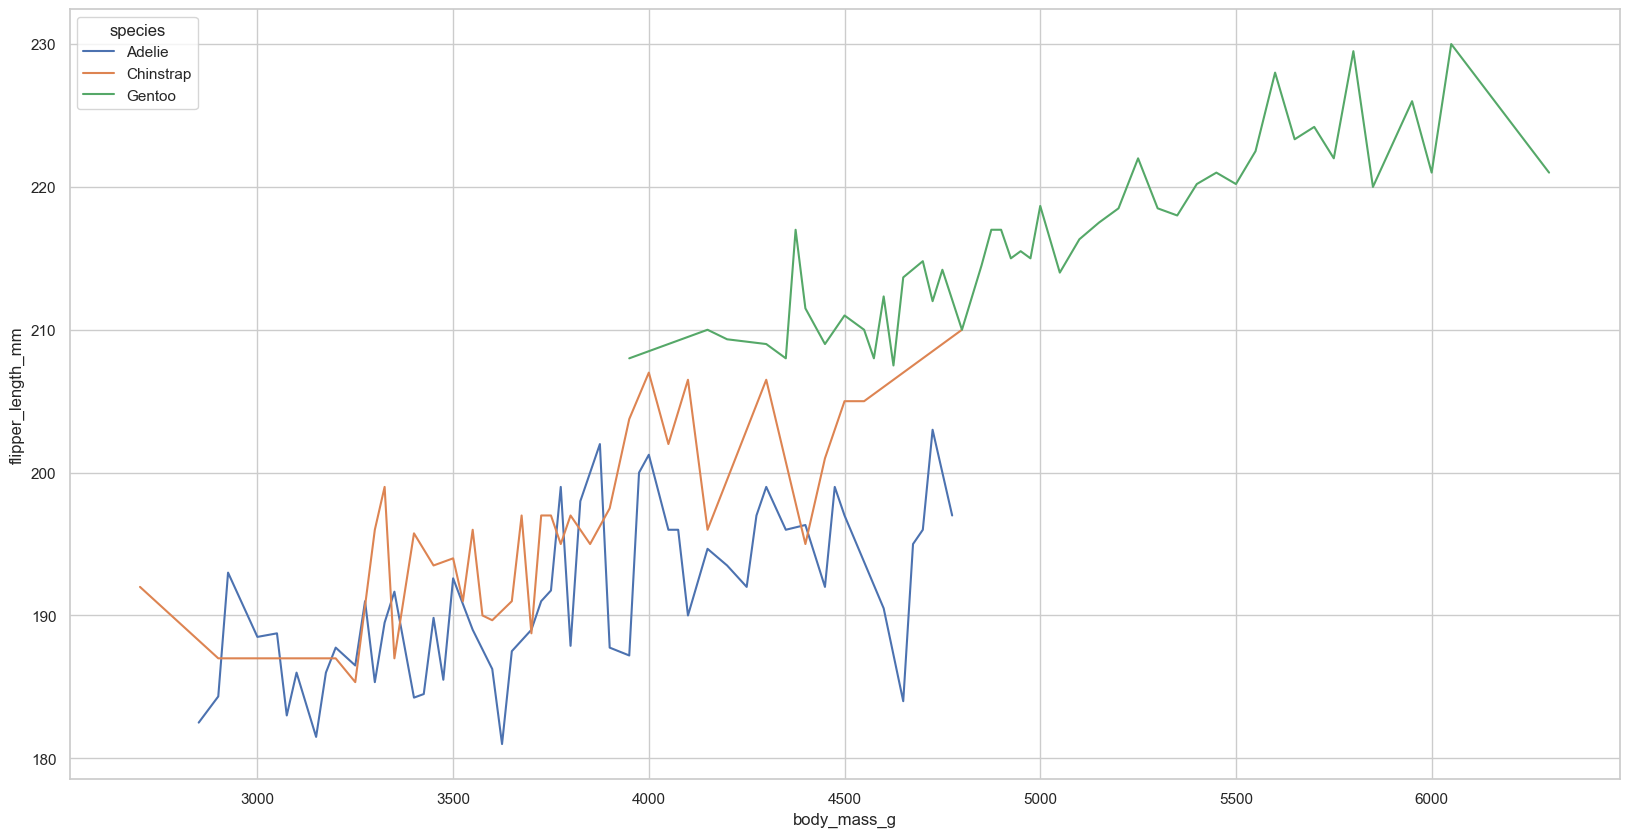

In [4]:
# penguin 데이터에 lineplot을 출력합니다.
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

sns.lineplot(data=penguins, 
             x='body_mass_g',
             y='flipper_length_mm',
             ci=None,                  # 신뢰구간 오차범위 제거
             hue='species')

plt.show()

### Pointplot

- 특정 수치 데이터를 error bar와 함께 출력해주는 plot.



- 수치 데이터를 다양한 각도에서 한 번에 바라보고 싶을 때 사용합니다.


- 데이터와 error bar를 한 번에 찍어주기 때문에, 살펴보고 싶은 특정 지표들만 사용하는 것이 좋습니다.

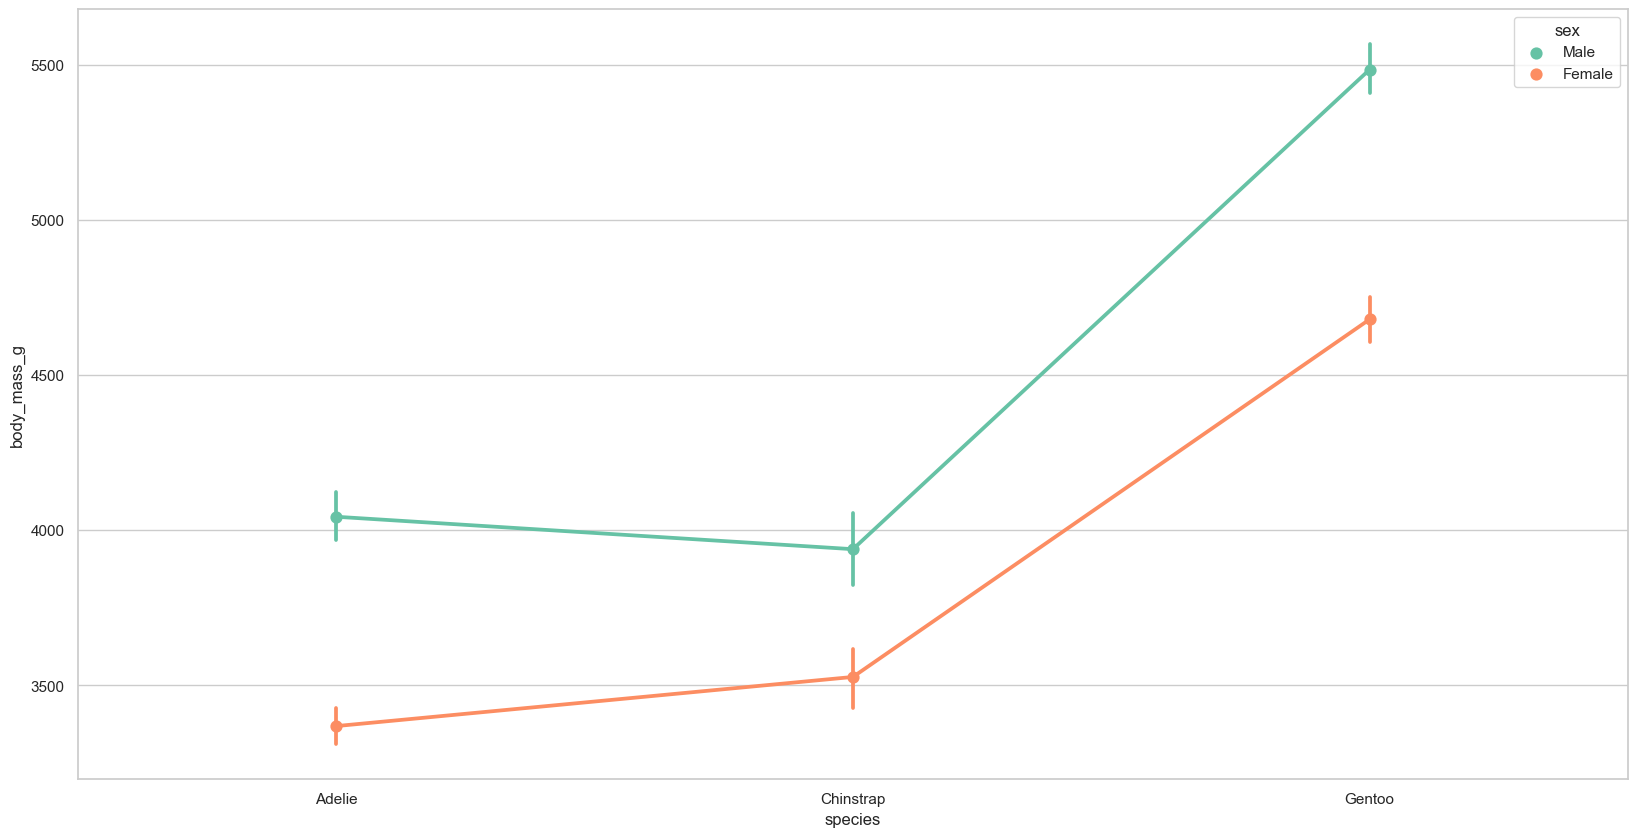

In [3]:
# penguin 데이터에 pointplot을 출력합니다.

plt.figure(figsize=(20,10))
sns.pointplot(data=penguins,
              x='species',
              y='body_mass_g',
              hue='sex',        # 세부 분류 설정
              palette='Set2')
              # seaborn palette 색상 조합은 검색해보기
plt.show()

## 3. 크기 표현하기

### Histplot 

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

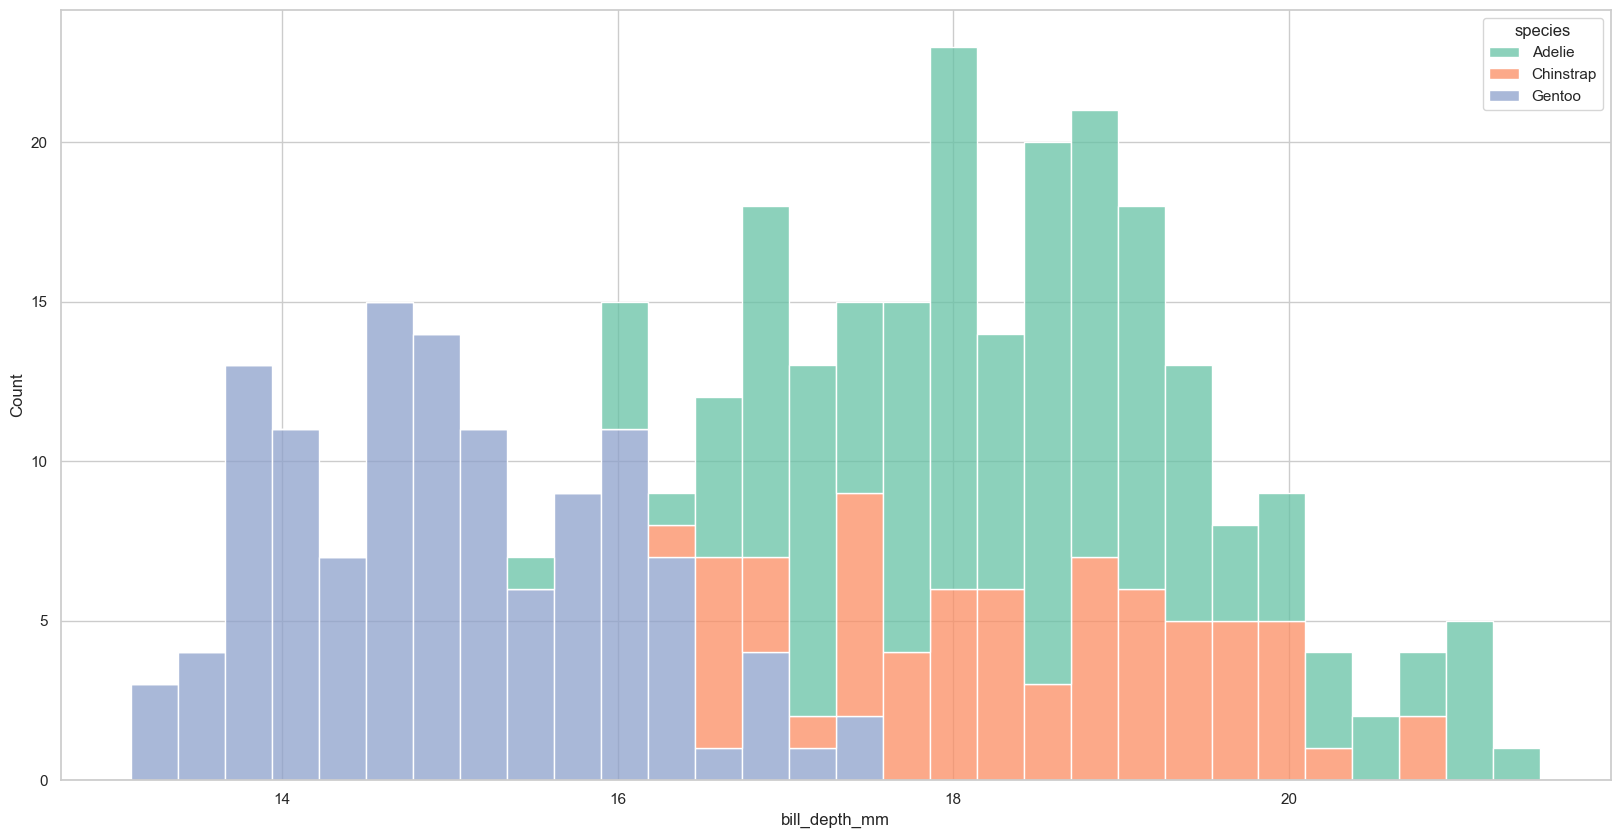

In [6]:
# penguin 데이터에 histplot을 출력합니다.

plt.figure(figsize=(20,10))
sns.histplot(data=penguins,
              x='bill_depth_mm',
              bins=30,
              hue='species',
              multiple='stack',   # 겹치지 않게 출력   
              palette='Set2')

plt.show()

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

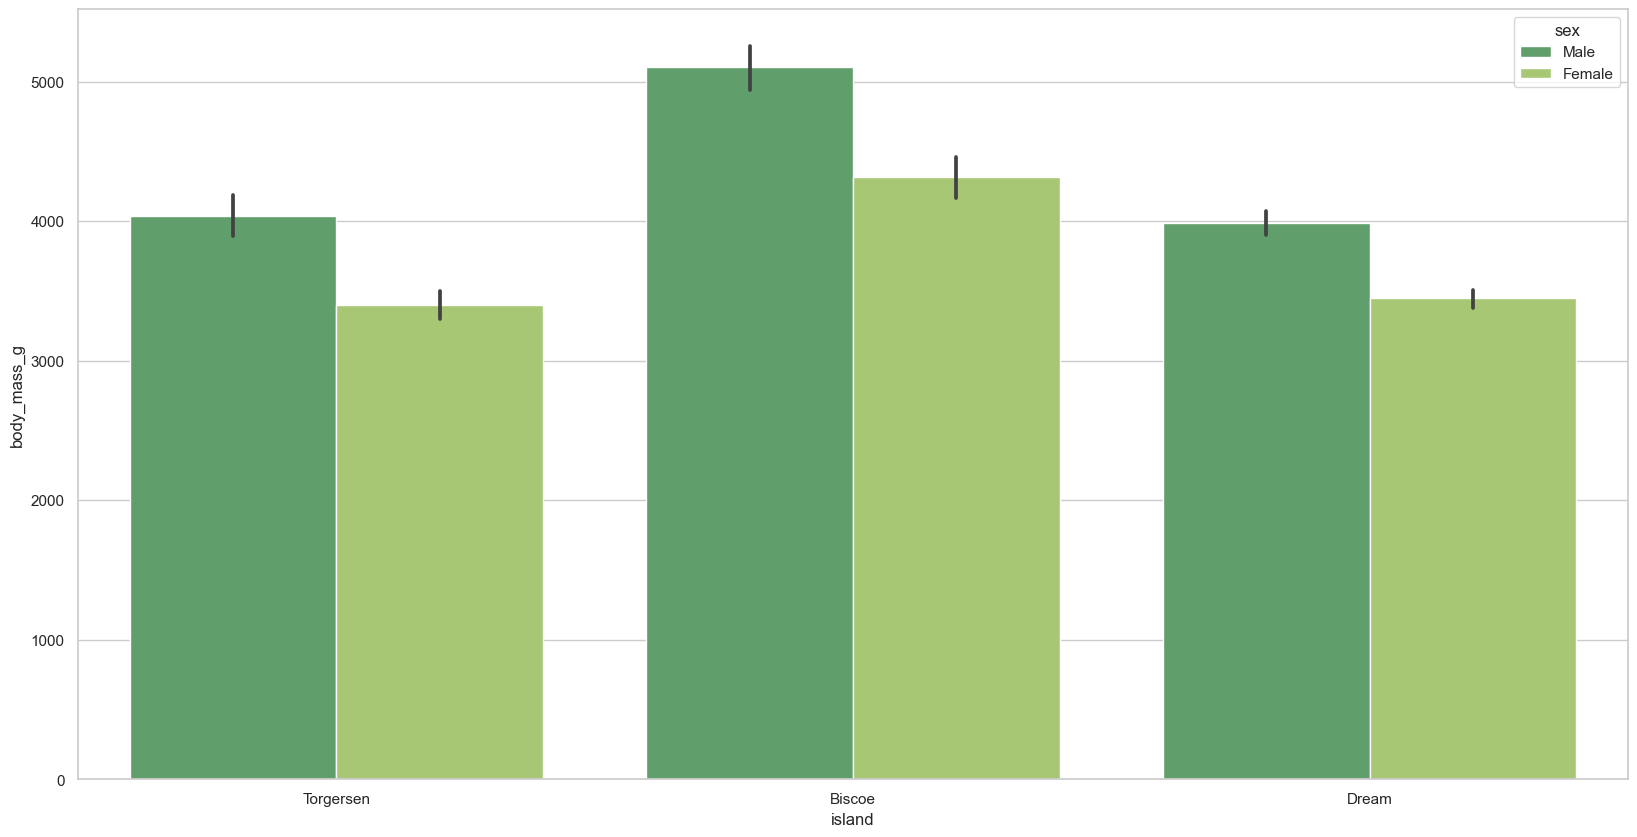

In [12]:
# penguin 데이터에 barplot을 출력합니다.

plt.figure(figsize=(20,10))
sns.barplot(data=penguins,
            x='island',
            y='body_mass_g',
            hue='sex',
            palette='summer')
plt.show()

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.



- 종류별 count를 보여주는 방법입니다.

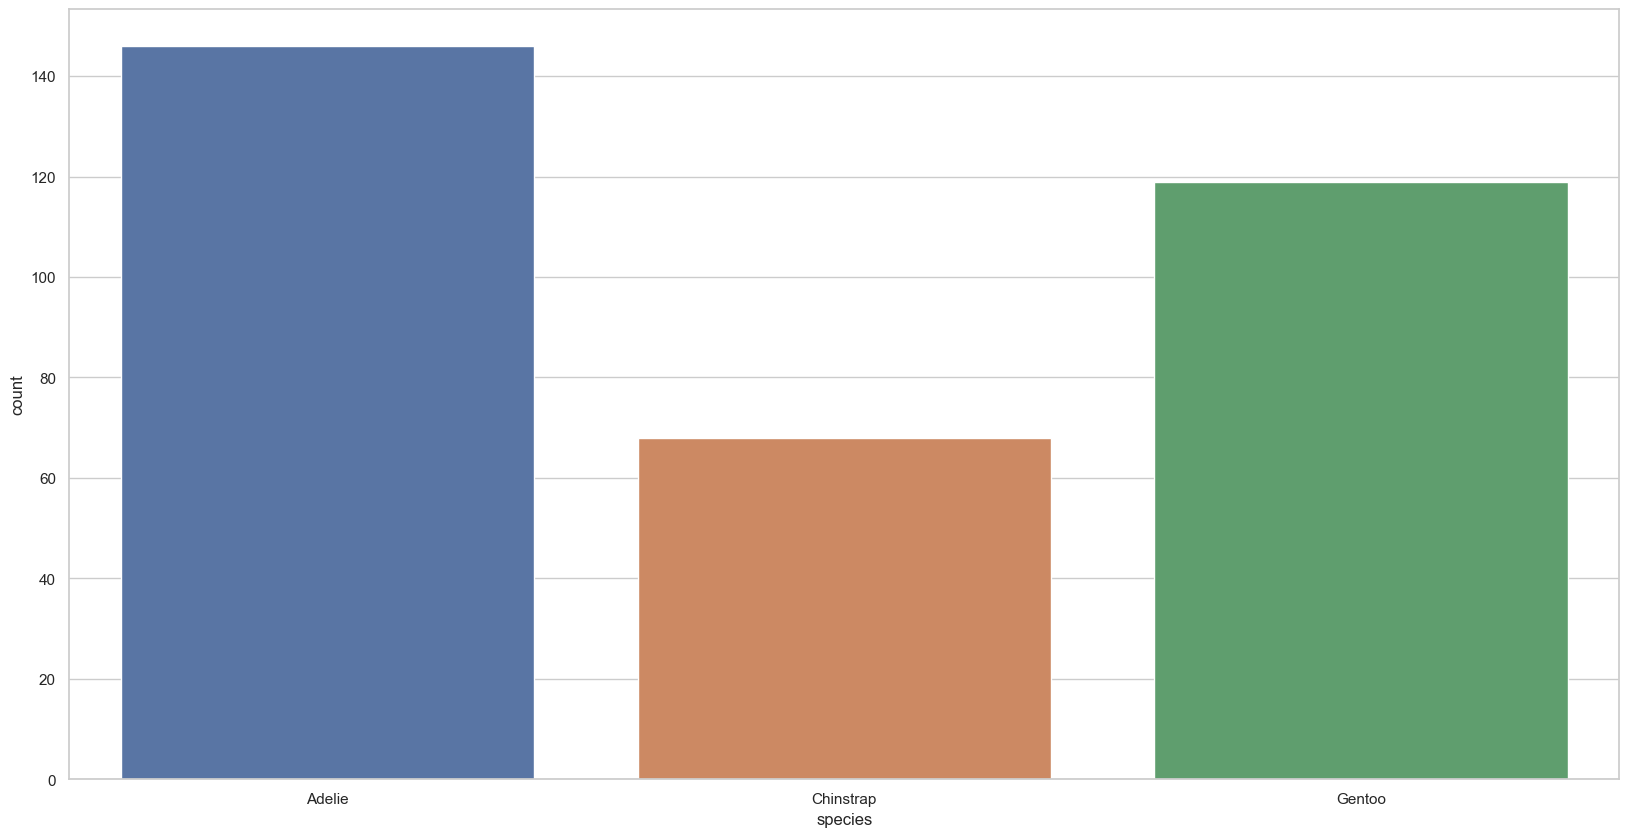

In [15]:
# penguin 데이터에 countplot을 출력합니다.

plt.figure(figsize=(20,10))
sns.countplot(data=penguins,
              x='species')
plt.show()

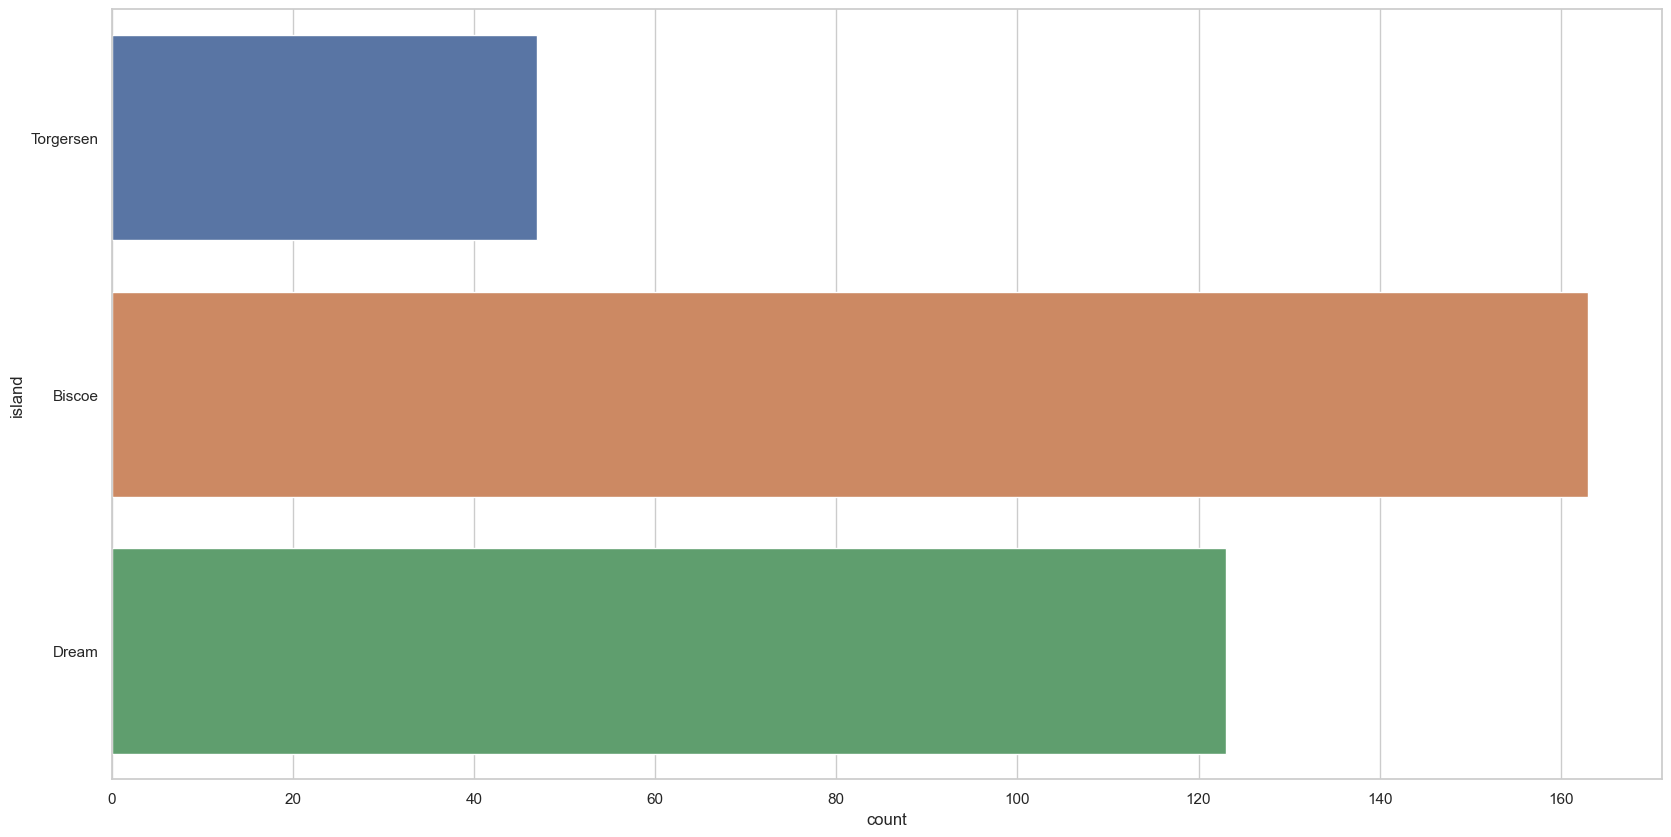

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data=penguins,
              y='island')       # 축이 바뀐다
plt.show()

## 4. 분포 표현하기

### Boxplot - 가장많이 사용


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

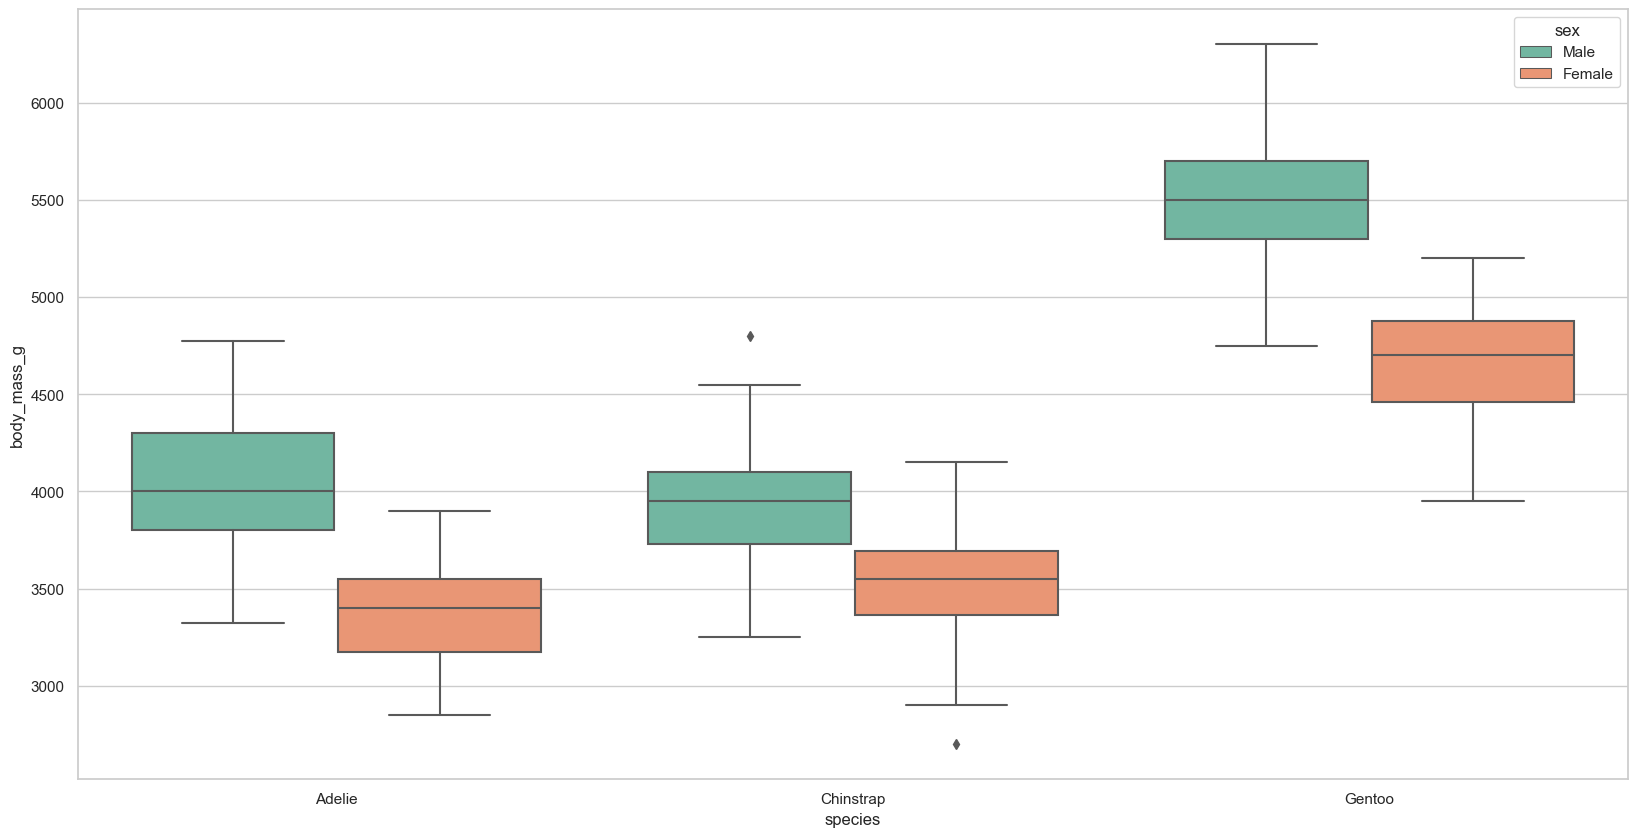

In [21]:
# penguin 데이터에 boxplot을 출력합니다.

plt.figure(figsize=(20,10))
sns.boxplot(data=penguins,
            x='species',
            y='body_mass_g',
            hue='sex',
            palette='Set2')
plt.show()

# 4/1 값, 4/2값, 4/3값을 표시해준다
# 즉 50%값이 표시된다
# 다이아몬드 값은 이상치 이다

### swarmplot 

- 데이터에 대한 분포 자체를 보여주는 plot.


- boxplot과 비슷하지만, 전체 분포에 대한 그림을 보여준다는 점에서 boxplot과 다릅니다.


- 보통 boxplot과 함께 표시하면, 평균 근처에 데이터가 얼마나 있는지(boxplot) 전체적으로 어떻게 퍼져있는지(swarmplot) 모두 확인이 가능합니다.

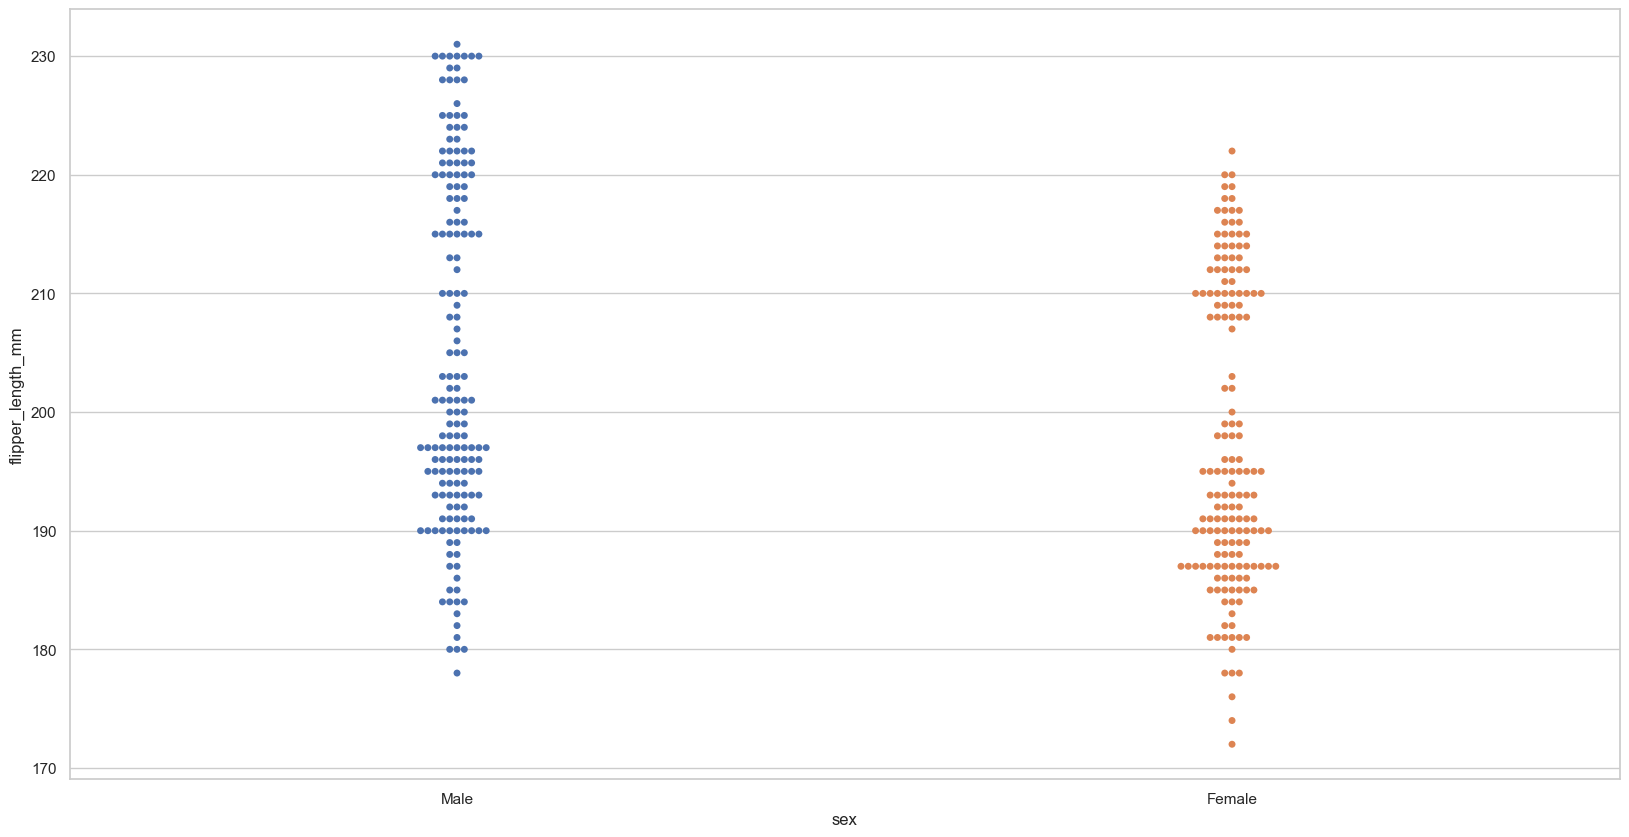

In [22]:
# penguin 데이터에 swarmplot을 출력합니다.

plt.figure(figsize=(20,10))
sns.swarmplot(data=penguins,
              x='sex',
              y='flipper_length_mm')
plt.show()
# 데이터가 점으로 찍혀서 분포도로 표시된다

### Scatterplot - 산포도

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

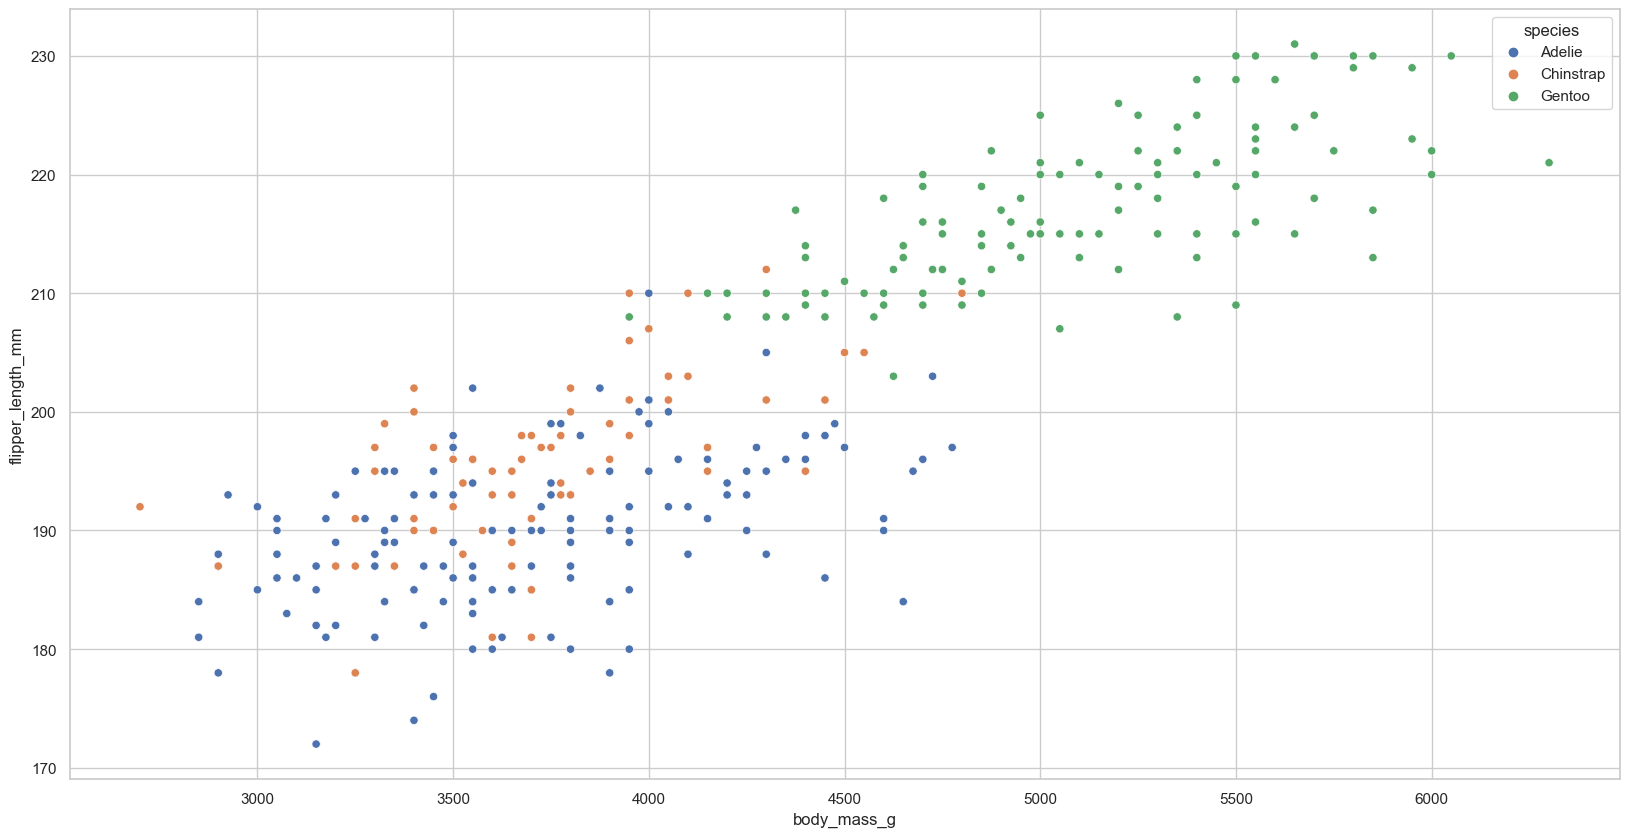

In [24]:
# penguin 데이터에 scatterplot을 출력합니다.

plt.figure(figsize=(20,10))
sns.scatterplot(data=penguins,
             x='body_mass_g',
             y='flipper_length_mm',
             hue='species')
plt.show()

## 5. 연관성 표현하기

### Heatmap - 상관관계

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

In [25]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [26]:
# 각 column간 상관관계를 파악하기 위해 Correlation matrix를 만듭니다.

penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


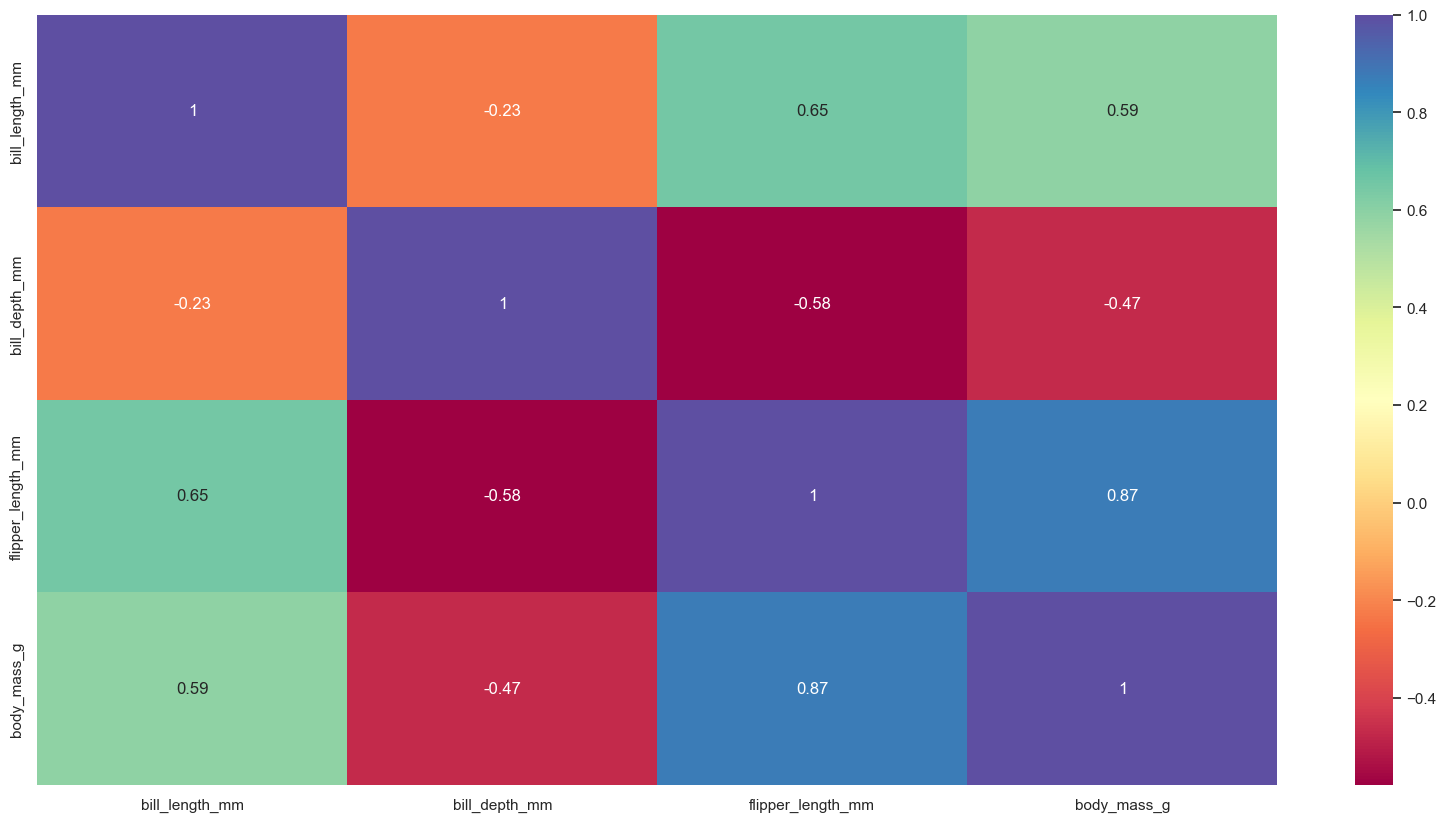

In [31]:
# penguin 데이터에 heatmap을 출력합니다.

plt.figure(figsize=(20,10))
sns.heatmap(data=penguins.corr(),
            annot=True,             # 해당 수치 표시
            cmap='Spectral')            
plt.show()

### Pairplot

<Figure size 3000x2000 with 0 Axes>

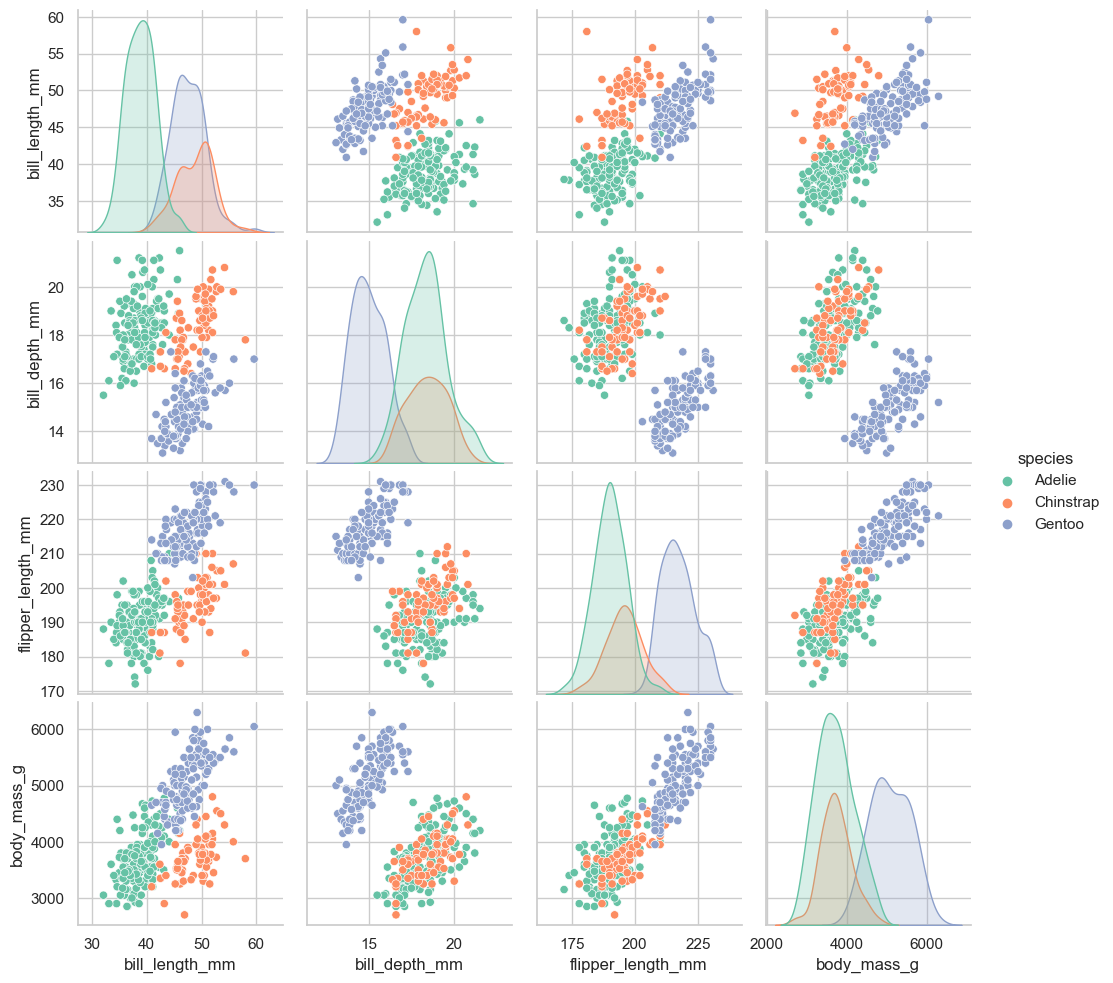

In [39]:
plt.figure(figsize=(30,20))
sns.pairplot(data=penguins,
             hue='species',
             palette='Set2')

plt.show()